<a href="https://colab.research.google.com/github/EdwardCaleb/Reinforcement-Learning-CSE437/blob/main/lab3_TD_Learning_EdwardLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [12]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -892
Episode 2: total reward = -1882
Episode 3: total reward = -1882
Episode 4: total reward = -892
Episode 5: total reward = -1387


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [23]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions)) # defining Q table

def greedy_func(state, Q_table):
  #rows are states, columns are actions
  best_action = np.argmax(Q_table[state])
  return best_action

def eps_greedy_func(state, Q_table, epsilon):
  #rows are states, columns are actions
  num_actions = Q_table.shape[1]
  if np.random.rand() < epsilon:
      # Explore: choose a random action
      action = np.random.randint(num_actions)
  else:
      # Exploit: choose the greedy action
      action = np.argmax(Q_table[state])
  return action


# Loop
for episode in range(n_episodes):
    state, info = env.reset() #initialize state
    done = False
    total_reward = 0

    # choose A from S, eps_greedy policy
    action = eps_greedy_func(state, Q, 0.1)

    for step in range(max_steps):
        # Take action A, observe R, S'
        next_state, reward, terminated, truncated, info = env.step(action)

        # choose A' from S', eps_greedy policy
        next_action = eps_greedy_func(next_state, Q, 0.1)

        # SARSA algorithm
        Q[state, action] = Q[state, action] + learning_rate*(reward + discount_factor*Q[next_state,next_action] - Q[state,action])

        total_reward += reward
        state = next_state
        action = next_action

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()



Episode 1: total reward = -100
Episode 2: total reward = -496
Episode 3: total reward = -397
Episode 4: total reward = -397
Episode 5: total reward = -199
Episode 6: total reward = -199
Episode 7: total reward = -100
Episode 8: total reward = -199
Episode 9: total reward = -298
Episode 10: total reward = -100
Episode 11: total reward = -100
Episode 12: total reward = -199
Episode 13: total reward = -75
Episode 14: total reward = -199
Episode 15: total reward = -100
Episode 16: total reward = -298
Episode 17: total reward = -97
Episode 18: total reward = -199
Episode 19: total reward = -69
Episode 20: total reward = -100
Episode 21: total reward = -100
Episode 22: total reward = -100
Episode 23: total reward = -199
Episode 24: total reward = -44
Episode 25: total reward = -100
Episode 26: total reward = -100
Episode 27: total reward = -57
Episode 28: total reward = -62
Episode 29: total reward = -100
Episode 30: total reward = -298
Episode 31: total reward = -496
Episode 32: total rewar

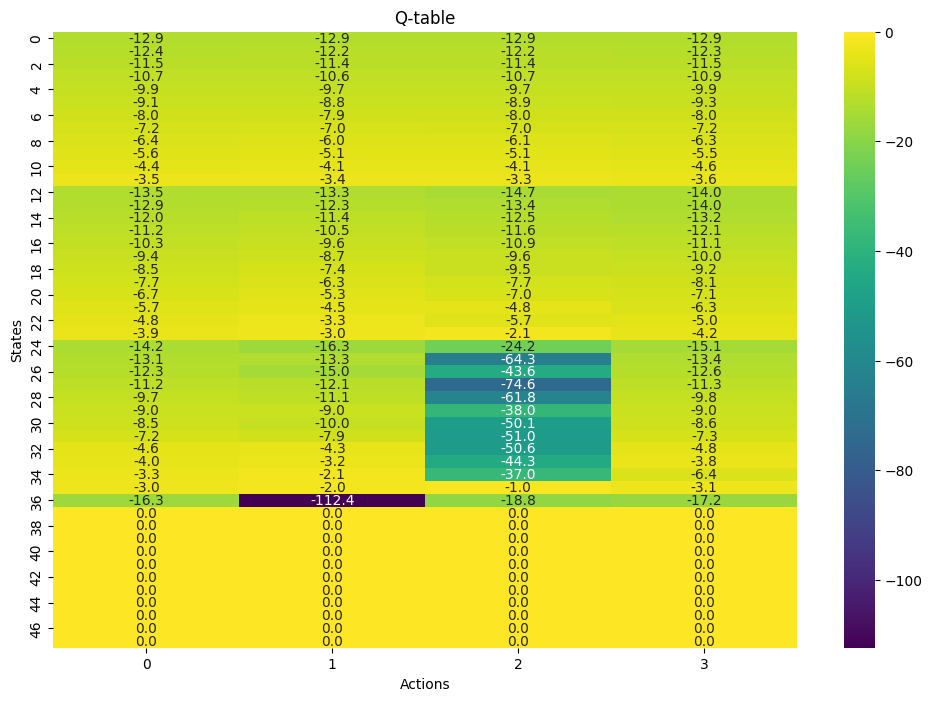

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

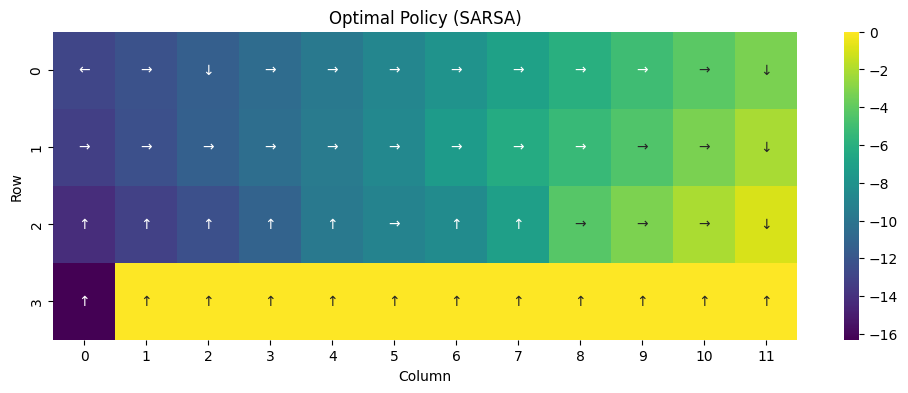

In [25]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()
plot_policy(Q)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

In [26]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions)) # defining Q table

def greedy_func(state, Q_table):
  #rows are states, columns are actions
  best_action = np.argmax(Q_table[state])
  return best_action

def eps_greedy_func(state, Q_table, epsilon):
  #rows are states, columns are actions
  num_actions = Q_table.shape[1]
  if np.random.rand() < epsilon:
      # Explore: choose a random action
      action = np.random.randint(num_actions)
  else:
      # Exploit: choose the greedy action
      action = np.argmax(Q_table[state])
  return action


# Loop
for episode in range(n_episodes):
    state, info = env.reset() #initialize state
    done = False
    total_reward = 0

    # choose A from S, eps_greedy policy
    action = eps_greedy_func(state, Q, 0)

    for step in range(max_steps):
        # Take action A, observe R, S'
        next_state, reward, terminated, truncated, info = env.step(action)

        # choose A' from S', eps_greedy policy
        next_action = eps_greedy_func(next_state, Q, 0)

        # SARSA algorithm
        Q[state, action] = Q[state, action] + learning_rate*(reward + discount_factor*Q[next_state,next_action] - Q[state,action])

        total_reward += reward
        state = next_state
        action = next_action

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()



Episode 1: total reward = -100
Episode 2: total reward = -298
Episode 3: total reward = -272
Episode 4: total reward = -298
Episode 5: total reward = -199
Episode 6: total reward = -199
Episode 7: total reward = -100
Episode 8: total reward = -199
Episode 9: total reward = -199
Episode 10: total reward = -199
Episode 11: total reward = -100
Episode 12: total reward = -199
Episode 13: total reward = -97
Episode 14: total reward = -100
Episode 15: total reward = -100
Episode 16: total reward = -100
Episode 17: total reward = -57
Episode 18: total reward = -100
Episode 19: total reward = -95
Episode 20: total reward = -100
Episode 21: total reward = -100
Episode 22: total reward = -83
Episode 23: total reward = -93
Episode 24: total reward = -89
Episode 25: total reward = -100
Episode 26: total reward = -53
Episode 27: total reward = -100
Episode 28: total reward = -63
Episode 29: total reward = -100
Episode 30: total reward = -91
Episode 31: total reward = -39
Episode 32: total reward = 

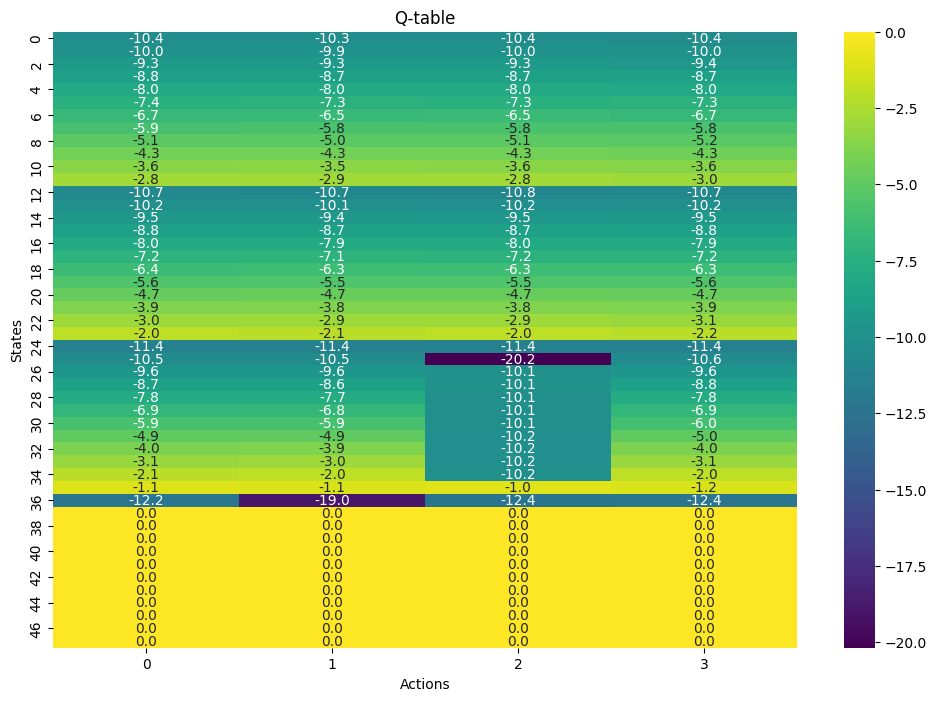

In [27]:
plot_Q(Q)

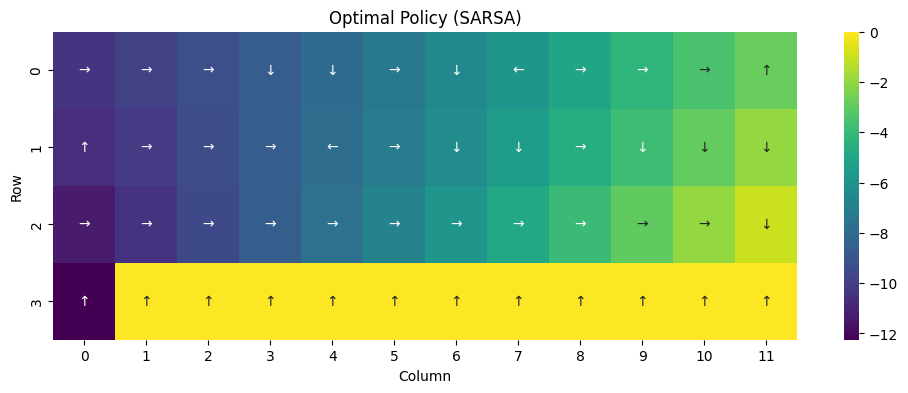

In [28]:
plot_policy(Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


In [59]:
import gymnasium as gym
import numpy as np

# Create the environment
env_sr = gym.make("CliffWalking-v1", render_mode="ansi", is_slippery=True)
env_ql = gym.make("CliffWalking-v1", render_mode="ansi", is_slippery=True)

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q_sr = np.zeros((n_states, n_actions)) # defining Q table sarsa
Q_ql = np.zeros((n_states, n_actions)) # defining Q table q-learning

# total reward numpy vectors
total_reward_vec_sr = np.zeros(n_episodes)   # preallocate with zeros
total_reward_vec_ql = np.zeros(n_episodes)   # preallocate with zeros

def eps_greedy_func(state, Q_table, epsilon):
  #rows are states, columns are actions
  num_actions = Q_table.shape[1]
  if np.random.rand() < epsilon:
      # Explore: choose a random action
      action = np.random.randint(num_actions)
  else:
      # Exploit: choose the greedy action
      action = np.argmax(Q_table[state])
  return action


# Loop SARSA
for episode in range(n_episodes):
    state_sr, info = env_sr.reset() #initialize state
    done = False
    total_reward_sr = 0

    # choose A from S, eps_greedy policy
    action_sr = eps_greedy_func(state_sr, Q_sr, 0.1)

    for step in range(max_steps):
        # Take action A, observe R, S'
        next_state_sr, reward_sr, terminated_sr, truncated_sr, info_sr = env_sr.step(action_sr)

        # choose A' from S', eps_greedy policy
        next_action_sr = eps_greedy_func(next_state_sr, Q_sr, 0.1)

        # SARSA algorithm
        Q_sr[state_sr, action_sr] = Q_sr[state_sr, action_sr] + learning_rate*(reward_sr + discount_factor*Q_sr[next_state_sr,next_action_sr] - Q_sr[state_sr,action_sr])


        total_reward_sr += reward_sr
        state_sr = next_state_sr
        action_sr = next_action_sr

        if terminated_sr or truncated_sr:
            break

    total_reward_vec_sr[episode] = total_reward_sr

    print(f"Episode {episode+1}: total reward = {total_reward_sr}")


# Loop Q-learning
for episode in range(n_episodes):
    state_ql, info = env_ql.reset() #initialize state
    done = False
    total_reward_ql = 0

    # choose A from S, eps_greedy policy
    action_ql = eps_greedy_func(state_ql, Q_ql, 0.0)

    for step in range(max_steps):
        # Take action A, observe R, S'
        next_state_ql, reward_ql, terminated_ql, truncated_ql, info_ql = env_ql.step(action_ql)

        # choose A' from S', eps_greedy policy
        next_action_ql = eps_greedy_func(next_state_ql, Q_ql, 0.0)

        # SARSA algorithm
        Q_ql[state_ql, action_ql] = Q_ql[state_ql, action_ql] + learning_rate*(reward_ql + discount_factor*Q_ql[next_state_ql,next_action_ql] - Q_ql[state_ql,action_ql])

        total_reward_ql += reward_ql
        state_ql = next_state_ql
        action_ql = next_action_ql

        if terminated_ql or truncated_ql:
            break

    total_reward_vec_ql[episode] = total_reward_ql

    print(f"Episode {episode+1}: total reward = {total_reward_ql}")

env.close()



Episode 1: total reward = -694
Episode 2: total reward = -595
Episode 3: total reward = -397
Episode 4: total reward = -298
Episode 5: total reward = -397
Episode 6: total reward = -199
Episode 7: total reward = -199
Episode 8: total reward = -298
Episode 9: total reward = -100
Episode 10: total reward = -199
Episode 11: total reward = -298
Episode 12: total reward = -199
Episode 13: total reward = -199
Episode 14: total reward = -298
Episode 15: total reward = -298
Episode 16: total reward = -100
Episode 17: total reward = -100
Episode 18: total reward = -199
Episode 19: total reward = -199
Episode 20: total reward = -100
Episode 21: total reward = -199
Episode 22: total reward = -199
Episode 23: total reward = -298
Episode 24: total reward = -57
Episode 25: total reward = -199
Episode 26: total reward = -199
Episode 27: total reward = -100
Episode 28: total reward = -298
Episode 29: total reward = -100
Episode 30: total reward = -199
Episode 31: total reward = -298
Episode 32: total 

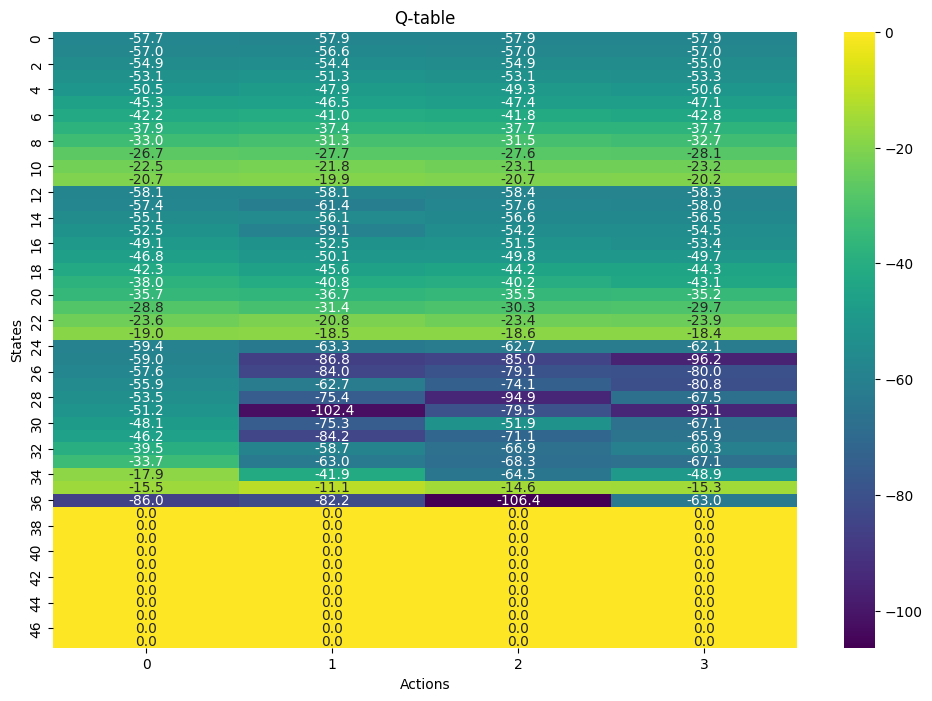

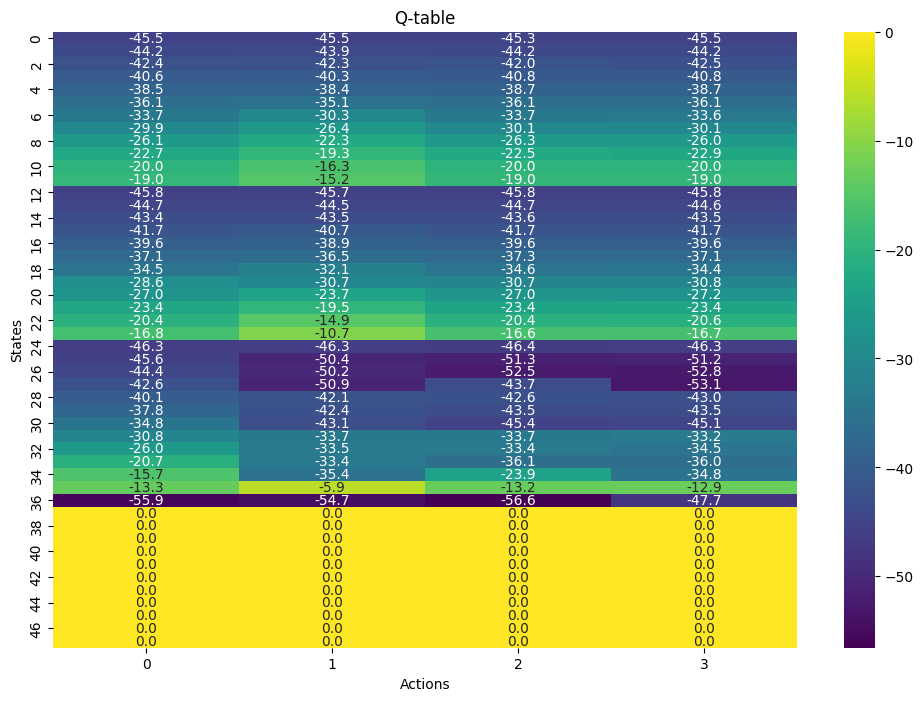

In [60]:
plot_Q(Q_sr)
plot_Q(Q_ql)

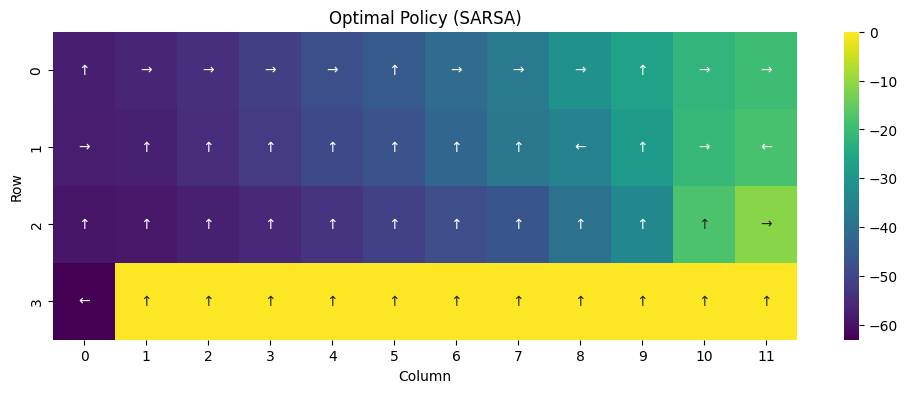

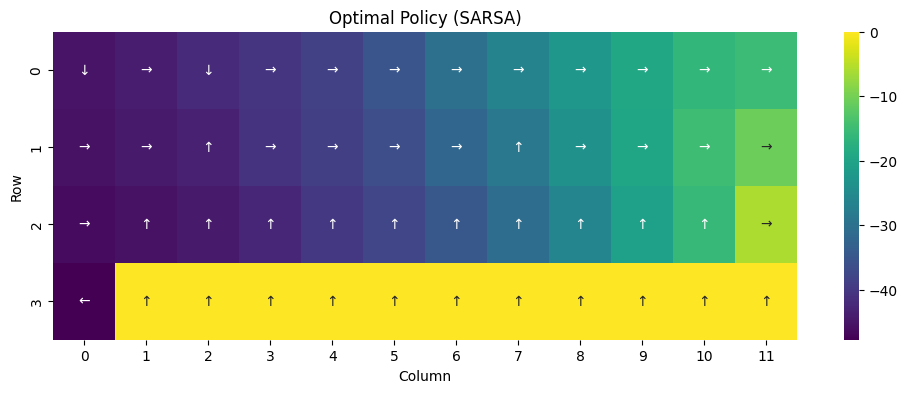

In [61]:
plot_policy(Q_sr, "SARSA")
plot_policy(Q_ql, "Q-Learning")

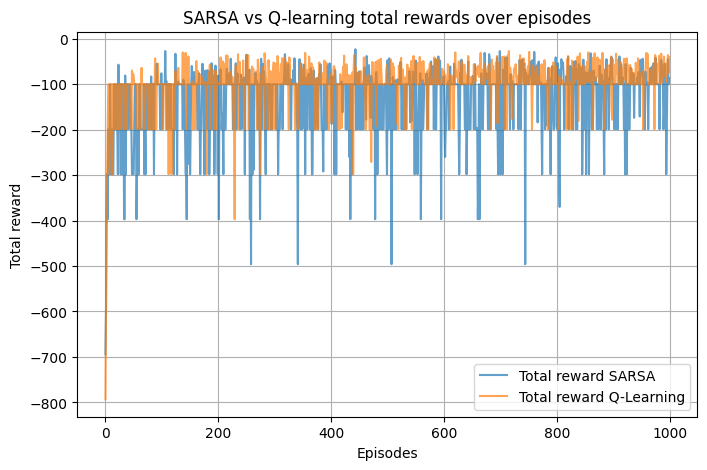

In [62]:
# Create a single figure with both plots
plt.figure(figsize=(8, 5))

plt.plot(range(n_episodes), total_reward_vec_sr, marker='', label="Total reward SARSA", alpha=0.7)
plt.plot(range(n_episodes), total_reward_vec_ql, marker='', label="Total reward Q-Learning", alpha=0.7)

plt.title("SARSA vs Q-learning total rewards over episodes")
plt.xlabel("Episodes")
plt.ylabel("Total reward")
plt.legend()
plt.grid(True)
plt.show()

# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?
